Team ID: PNT2022TMID21021

OpenCv for Video processing

In [2]:
#importing required libraries
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/IBM/Dataset/Dataset/train_set", target_size=(128,128), batch_size = 32,
                                          class_mode = 'binary' )

Found 436 images belonging to 2 classes.


In [5]:
test_dataset = test.flow_from_directory("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set", target_size=(128,128), batch_size = 32,
                                          class_mode = 'binary' )


Found 121 images belonging to 2 classes.


In [6]:
  test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [7]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [8]:
model = keras.Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [9]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [11]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5
14/14 [==============================] - 167s 12s/step - loss: 0.5306 - accuracy: 0.7362 - val_loss: 0.2076 - val_accuracy: 0.9752
Epoch 2/5
14/14 [==============================] - 26s 2s/step - loss: 0.2540 - accuracy: 0.8899 - val_loss: 0.0551 - val_accuracy: 0.9917
Epoch 3/5
14/14 [==============================] - 26s 2s/step - loss: 0.1766 - accuracy: 0.9335 - val_loss: 0.0595 - val_accuracy: 0.9835
Epoch 4/5
14/14 [==============================] - 26s 2s/step - loss: 0.1504 - accuracy: 0.9404 - val_loss: 0.0603 - val_accuracy: 0.9835
Epoch 5/5
14/14 [==============================] - 26s 2s/step - loss: 0.1726 - accuracy: 0.9220 - val_loss: 0.0669 - val_accuracy: 0.9752


In [13]:
pred = model.predict(test_dataset)
pred = np.round(pred)

4/4 [==============================] - 5s 1s/step


In [14]:
pred

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],

In [15]:
print(len(pred))

121


In [29]:
model.save("/content/forest1.h5")

In [48]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [31]:
model = load_model("/content/forest1.h5")

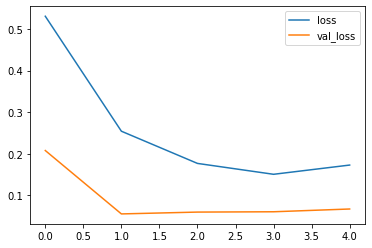

In [32]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

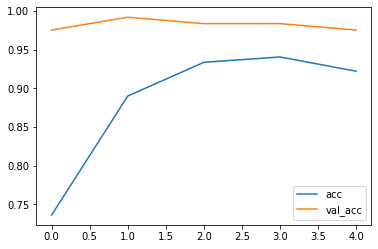

In [45]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [49]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(128,128))
  plt.imshow(img1)
  y=image.img_to_array(img1)
  x=np.expand_dims(y,axis=0)
  ctr=model.predict(x)
  print(ctr)
  if ctr==1:
    plt.xlabel("Fire detected",fontsize=30)
  elif ctr==0:
    plt.xlabel("No fire detected",fontsize=30)

1/1 [==============================] - 0s 87ms/step
[[0.]]


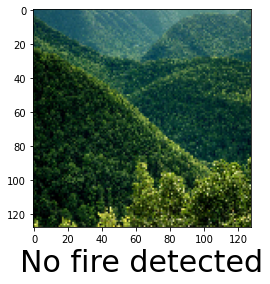

In [50]:
predictImage("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/forest/2017_10_12_09_01_56.jpg")

1/1 [==============================] - 0s 95ms/step
[[1.]]


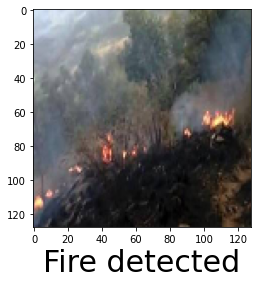

In [51]:
predictImage("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/with fire/FORESTFIRE (1).jpg")

1/1 [==============================] - 0s 22ms/step
[[0.]]


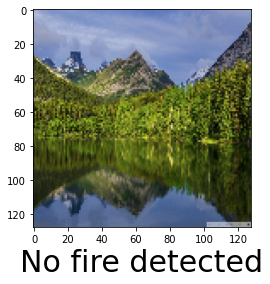

In [52]:
predictImage("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/forest/beautiful_mountain_forest_wallpaper_1920x1200.jpg")

1/1 [==============================] - 0s 22ms/step
[[1.]]


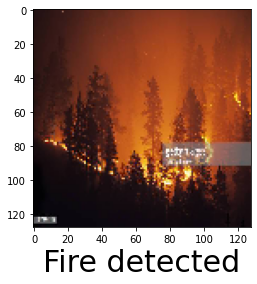

In [53]:
predictImage("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/with fire/ring_of_fire_bailey_colorado_rocky_mountain_forest_wildfire_picture_id157384116.jpg")

In [38]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [39]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=30b2e08d74d648de51371395fa9b6f6451761f7fed1c365e72da811c5c30065a
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [40]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [42]:
#load the saved model
model = load_model(r'/content/forest1.h5')
#define video
video = cv2.VideoCapture('/content/drive/MyDrive/forest fire.mp4')
#define the features
name = ['forest','with forest']